In [31]:
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv("../user_data/third_party_data/TLT.csv")
df = df.set_index("Date")
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,41.799530,6100
2002-07-31,81.949997,82.800003,81.900002,82.529999,42.317417,29400
2002-08-01,82.540001,83.019997,82.540001,83.000000,42.558395,25000
2002-08-02,83.160004,84.099998,82.879997,83.849998,42.994259,52800
2002-08-05,84.040001,84.440002,83.849998,84.220001,43.183964,61100
...,...,...,...,...,...,...
2022-07-08,113.500000,113.500000,112.050003,112.500000,112.500000,15318000
2022-07-11,113.790001,114.790001,113.699997,114.440002,114.440002,13639900
2022-07-12,115.510002,116.230003,114.970001,115.120003,115.120003,18547300


In [33]:
df["Close"].index

Index(['2002-07-30', '2002-07-31', '2002-08-01', '2002-08-02', '2002-08-05',
       '2002-08-06', '2002-08-07', '2002-08-08', '2002-08-09', '2002-08-12',
       ...
       '2022-06-30', '2022-07-01', '2022-07-05', '2022-07-06', '2022-07-07',
       '2022-07-08', '2022-07-11', '2022-07-12', '2022-07-13', '2022-07-14'],
      dtype='object', name='Date', length=5025)

In [34]:
max_idx = argrelextrema(df['Close'].to_numpy(), np.greater, order=500)[0]
min_idx = argrelextrema(df['Close'].to_numpy(), np.less, order=500)[0]

In [35]:
df.iloc[max_idx]['Close']

Date
2003-06-13     97.180000
2005-06-30     96.699997
2008-12-19    122.260002
2012-07-25    132.160004
2016-07-08    143.600006
2020-08-04    171.570007
Name: Close, dtype: float64

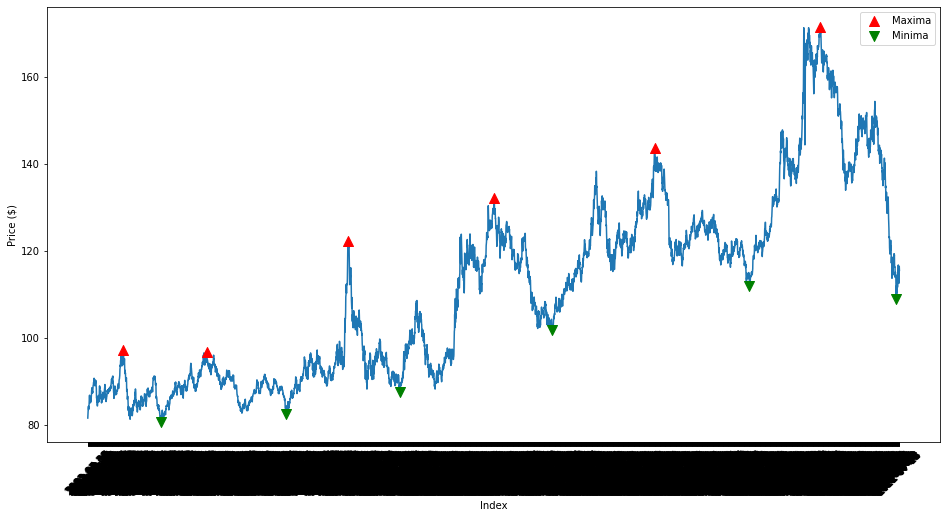

In [36]:
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], zorder=0)
plt.xticks(rotation = 45)
plt.scatter(df.iloc[max_idx].index, df.iloc[max_idx]['Close'],
  label='Maxima', s=100, color="r", marker='^')
plt.scatter(df.iloc[min_idx].index, df.iloc[min_idx]['Close'],
  label='Minima', s=100, color="g", marker='v')

plt.xlabel("Index")
plt.ylabel("Price ($)")
plt.legend()
plt.show()